# Mount the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# unzip the file

In [8]:
!unzip "/content/drive/MyDrive/shoes_classifier/all.zip" -d "/content/drive/MyDrive/shoes_classifier"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/shoes_classifier/all/11431.jpg  
  inflating: /content/drive/MyDrive/shoes_classifier/__MACOSX/all/._11431.jpg  
  inflating: /content/drive/MyDrive/shoes_classifier/all/4619.jpg  
  inflating: /content/drive/MyDrive/shoes_classifier/__MACOSX/all/._4619.jpg  
  inflating: /content/drive/MyDrive/shoes_classifier/all/2283.jpg  
  inflating: /content/drive/MyDrive/shoes_classifier/__MACOSX/all/._2283.jpg  
  inflating: /content/drive/MyDrive/shoes_classifier/all/1952.jpg  
  inflating: /content/drive/MyDrive/shoes_classifier/__MACOSX/all/._1952.jpg  
  inflating: /content/drive/MyDrive/shoes_classifier/all/6783.jpg  
  inflating: /content/drive/MyDrive/shoes_classifier/__MACOSX/all/._6783.jpg  
  inflating: /content/drive/MyDrive/shoes_classifier/all/578.jpg  
  inflating: /content/drive/MyDrive/shoes_classifier/__MACOSX/all/._578.jpg  
  inflating: /content/drive/MyDrive/shoes_classifier/all/8976.jpg  

# image classify using VGG16 model

In [2]:
import os
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

import shutil

In [3]:
model = VGG16(weights='imagenet')

In [4]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    return decode_predictions(preds, top=1)[0][0]

In [5]:
def categorize_footwear(prediction):
    footwear_categories = {
        'sandal': 'sandals',
        'running_shoe': 'shoes',
        'ankle_boot': 'boots',
        'cowboy_boot': 'boots',
        'slipper': 'slippers'
    }

    for key in footwear_categories:
        if key in prediction[1]:
            return footwear_categories[key]
    return 'other'

In [6]:
def process_and_move_image(img_path, dest_folder):
    prediction = predict_image(img_path)
    category = categorize_footwear(prediction)

    dest_path = os.path.join(dest_folder, category)
    os.makedirs(dest_path, exist_ok=True)

    shutil.move(img_path, os.path.join(dest_path, os.path.basename(img_path)))
    print(f"Moved {os.path.basename(img_path)} to {category}")

In [7]:
def main():
    source_folder = '/content/drive/MyDrive/shoes_classifier/all'
    destination_folder = '/content/drive/MyDrive/shoes_classifier/dest_path'

    for filename in os.listdir(source_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(source_folder, filename)
            process_and_move_image(img_path, destination_folder)

if __name__ == "__main__":
    main()

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 27ms/step
Moved 11431.jpg to sandals
1/1 [==============================] - 0s 32ms/step
Moved 4619.jpg to sandals
1/1 [==============================] - 0s 26ms/step
Moved 2283.jpg to sandals
1/1 [==============================] - 0s 34ms/step
Moved 1952.jpg to other
1/1 [==============================] - 0s 28ms/step
Moved 6783.jpg to sandals
1/1 [==============================] - 0s 20ms/step
Moved 578.jpg to sandals
1/1 [==============================] - 0s 31ms/step
Moved 8976.jpg to boots
1/1 [==============================] - 0s 27ms/step
Moved 3823.jpg to sandals
1/1 [==============================] - 0s 21ms/step
Moved 4194.jpg to sandals
1/1 [==============================] - 0s 22ms/step
Moved 3837.jpg to other
1/1 [==============================] - 0s 24ms/step
Moved 4180.jpg to sandals
1/1 [==============================] - 0s 21ms/step
Moved 7489.jpg to shoes
1/1 [================

# Check split images

In [9]:
folder_path = r'/content/drive/MyDrive/shoes_classifier/dest_path/boots'; print(f"Number of image files: {sum(len([f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp'))]) for _, _, files in os.walk(folder_path))}")

Number of image files: 2546


In [10]:
folder_path = r'/content/drive/MyDrive/shoes_classifier/dest_path/sandals'; print(f"Number of image files: {sum(len([f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp'))]) for _, _, files in os.walk(folder_path))}")

Number of image files: 4651


In [12]:
folder_path = r'/content/drive/MyDrive/shoes_classifier/dest_path/shoes'; print(f"Number of image files: {sum(len([f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp'))]) for _, _, files in os.walk(folder_path))}")

Number of image files: 2323


In [13]:
folder_path = r'/content/drive/MyDrive/shoes_classifier/dest_path/other'; print(f"Number of image files: {sum(len([f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp'))]) for _, _, files in os.walk(folder_path))}")

Number of image files: 5480


In [14]:
2546+4651+2323+5480

15000

# Again check

In [15]:
def main():
    source_folder = '/content/drive/MyDrive/shoes_classifier/dest_path/other'
    destination_folder = '/content/drive/MyDrive/shoes_classifier/dest_path'

    for filename in os.listdir(source_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(source_folder, filename)
            process_and_move_image(img_path, destination_folder)

if __name__ == "__main__":
    main()

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 28ms/step
Moved 6523.jpg to other
1/1 [==============================] - 0s 24ms/step
Moved 12415.jpg to other
1/1 [==============================] - 0s 26ms/step
Moved 900.jpg to other
1/1 [==============================] - 0s 25ms/step
Moved 10202.jpg to other
1/1 [==============================] - 0s 25ms/step
Moved 2745.jpg to other
1/1 [==============================] - 0s 22ms/step
Moved 12373.jpg to other
1/1 [==============================] - 0s 26ms/step
Moved 9162.jpg to other
1/1 [==============================] - 0s 26ms/step
Moved 2037.jpg to other
1/1 [==============================] - 0s 21ms/step
Moved 4320.jpg to other
1/1 [==============================] - 0s 34ms/step
Moved 2989.jpg to other
1/1 [==============================] - 0s 30ms/step
Moved 10216.jpg to other
1/1 [==============================] - 0s 25ms/step
Moved 7629.jpg to other
1/1 [=============================

In [16]:
folder_path = r'/content/drive/MyDrive/shoes_classifier/dest_path/boots'; print(f"Number of image files: {sum(len([f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp'))]) for _, _, files in os.walk(folder_path))}")

Number of image files: 2546


In [17]:
folder_path = r'/content/drive/MyDrive/shoes_classifier/dest_path/sandals'; print(f"Number of image files: {sum(len([f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp'))]) for _, _, files in os.walk(folder_path))}")

Number of image files: 4651


In [18]:
folder_path = r'/content/drive/MyDrive/shoes_classifier/dest_path/shoes'; print(f"Number of image files: {sum(len([f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp'))]) for _, _, files in os.walk(folder_path))}")

Number of image files: 2323


In [19]:
folder_path = r'/content/drive/MyDrive/shoes_classifier/dest_path/other'; print(f"Number of image files: {sum(len([f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp'))]) for _, _, files in os.walk(folder_path))}")

Number of image files: 5480


# Now Again classify With ResNet50 But no change

In [1]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import shutil

In [2]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1000, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [3]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    return decode_predictions(preds, top=1)[0][0]

In [4]:
def categorize_footwear(prediction):
    footwear_categories = {
        'sandal': 'sandals',
        'running_shoe': 'shoes',
        'ankle_boot': 'boots',
        'cowboy_boot': 'boots',
        'slipper': 'slippers'
    }

    for key in footwear_categories:
        if key in prediction[1]:
            return footwear_categories[key]
    return 'other'

In [5]:
def process_and_move_image(img_path, dest_folder):
    prediction = predict_image(img_path)
    category = categorize_footwear(prediction)

    dest_path = os.path.join(dest_folder, category)
    os.makedirs(dest_path, exist_ok=True)

    shutil.move(img_path, os.path.join(dest_path, os.path.basename(img_path)))
    print(f"Moved {os.path.basename(img_path)} to {category}")

In [6]:
def main():
    source_folder = '/content/drive/MyDrive/shoes_classifier/dest_path/other'
    destination_folder = '/content/drive/MyDrive/shoes_classifier/dest_path'

    for filename in os.listdir(source_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(source_folder, filename)
            process_and_move_image(img_path, destination_folder)

if __name__ == "__main__":
    main()

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 61ms/step
Moved 6523.jpg to other
1/1 [==============================] - 0s 43ms/step
Moved 12415.jpg to other
1/1 [==============================] - 0s 65ms/step
Moved 900.jpg to other
1/1 [==============================] - 0s 39ms/step
Moved 10202.jpg to other
1/1 [==============================] - 0s 39ms/step
Moved 2745.jpg to other
1/1 [==============================] - 0s 40ms/step
Moved 12373.jpg to other
1/1 [==============================] - 0s 64ms/step
Moved 9162.jpg to other
1/1 [==============================] - 0s 49ms/step
Moved 2037.jpg to other
1/1 [==============================] - 0s 53ms/step
Moved 4320.jpg to other
1/1 [==============================] - 0s 41ms/step
Moved 2989.jpg to other
1/1 [==============================] - 0s 36ms/step
Moved 10216.jpg to other
1/1 [==============================] - 0s 47ms/step
Moved 7629.jpg to other
1/1 [=============================

# Plot the images

In [18]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random

def load_random_images(base_path, num_images=5):
    classes = ['boots', 'sandals', 'shoes','other']
    images = {}

    for fw in classes:
        fw_path = os.path.join(base_path,  fw)
        all_images = os.listdir(fw_path)
        selected_images = random.sample(all_images, num_images)
        images[fw] = [os.path.join(fw_path, img) for img in selected_images]

    return images

In [19]:
def plot_images(images):
    num_classes = len(images)
    num_images_per_class = len(images[next(iter(images))])

    fig, axes = plt.subplots(num_classes, num_images_per_class, figsize=(15, 10))

    for i, (fw, img_paths) in enumerate(images.items()):
        for j, img_path in enumerate(img_paths):
            img = Image.open(img_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            axes[i, j].set_title(fw.capitalize(), fontsize=10, pad=5)

    plt.tight_layout()
    plt.show()

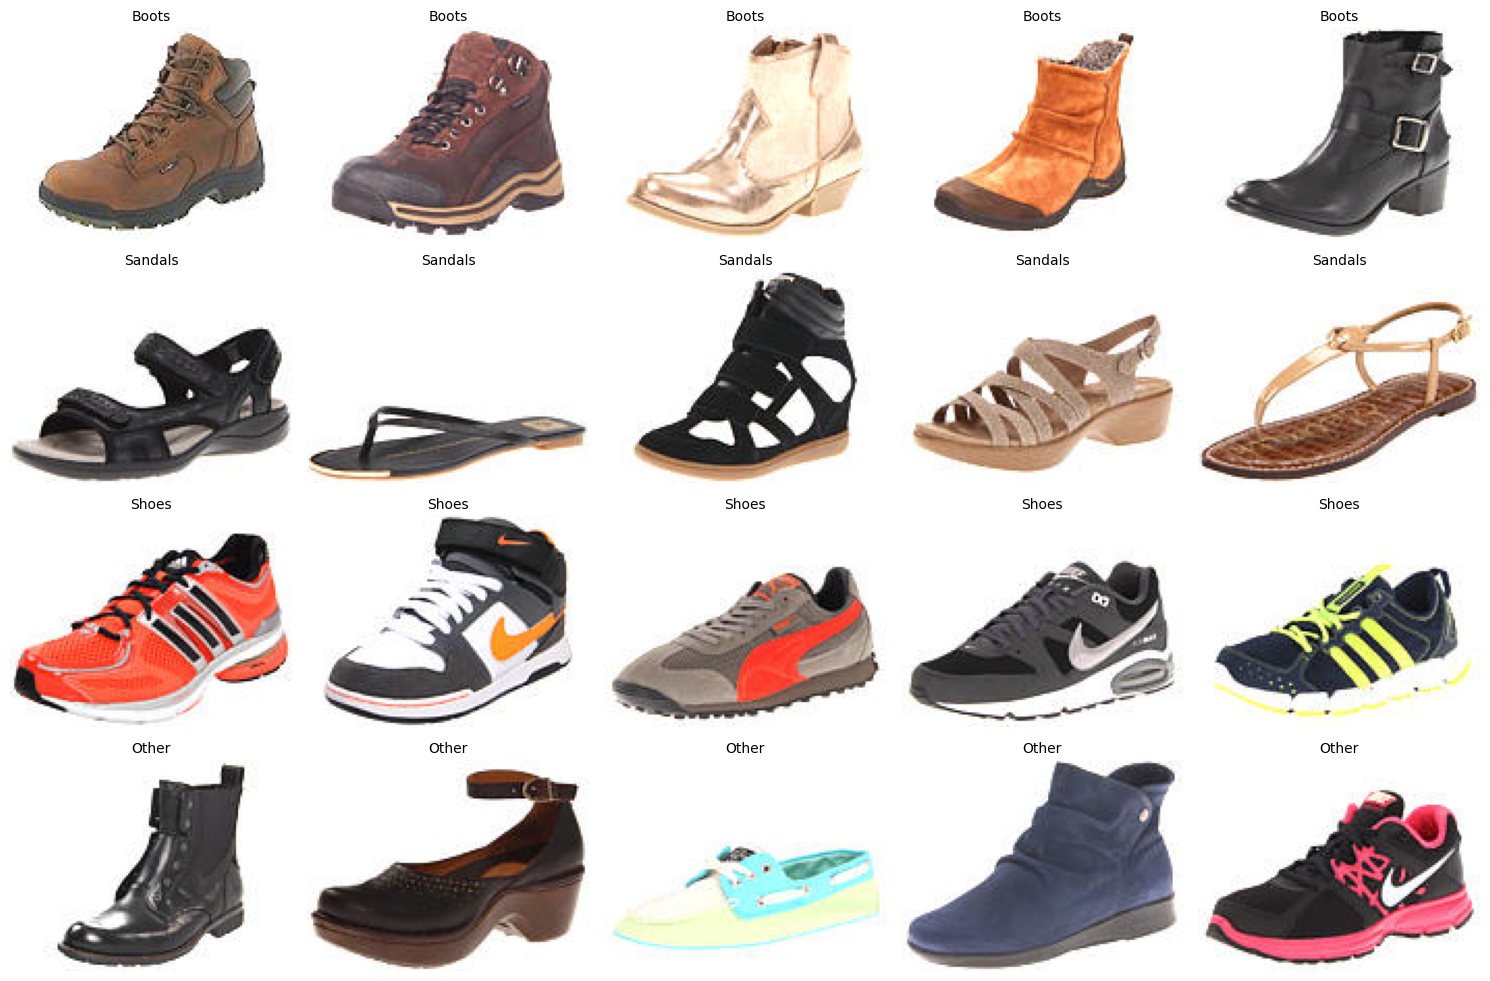

In [21]:
base_path = '/content/drive/MyDrive/shoes_classifier/dest_path'
random_images = load_random_images(base_path)
plot_images(random_images)

# Now i want to fine tune the pre_train model on these classes shoes boot and sandals and use these model weights to classify the other folder